<a href="https://colab.research.google.com/github/Anusarakh/thesis/blob/main/Test_Music_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Thesis/music/features_30_sec_2label.csv')
data

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.06450,2002.449060,85882.76132,3805.839606,9.015054e+05,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.07360,2039.036516,213843.75550,3550.522098,2.977893e+06,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.64340,1747.702312,76254.19226,3042.260232,7.840345e+05,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.94240,1596.412872,166441.49480,2184.745799,1.493194e+06,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.93930,1748.172116,88445.20904,3579.757627,1.572978e+06,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.227693,0.088256,0.013564,0.000229,1800.888692,285133.98220,1781.068502,62925.51721,3427.243261,8.645783e+05,...,136.467468,2.417449,125.991013,0.779610,68.256584,-3.415084,162.598373,-0.739651,160.096695,classical
196,0.293052,0.082874,0.056987,0.000786,1933.689602,192223.36290,1740.491088,27385.87471,3573.962147,4.543625e+05,...,49.117809,2.988827,39.963310,3.548611,52.965549,-3.346735,87.178192,-3.686793,108.163559,classical
197,0.222265,0.083254,0.036720,0.000465,1494.419821,92293.65472,1671.195986,31772.32080,2781.813393,3.395294e+05,...,97.051605,0.787177,74.531082,-3.961360,52.424522,-9.148158,118.060761,-6.935011,104.361465,classical
198,0.289919,0.088790,0.029094,0.000332,1952.495511,166304.03580,1865.737617,22529.55381,3779.826564,4.477117e+05,...,59.865459,7.026492,83.698685,8.378774,71.380379,-5.610244,61.358536,1.379220,123.965485,classical


In [4]:
data.shape

(200, 58)

##Encoding the Labels

In [5]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [6]:
y.shape

(200,)

##Scaling the Feature columns


In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
X

array([[ 0.73728741,  0.14400498,  0.63020804, ..., -0.62101218,
         0.67385914, -0.82467388],
       [ 0.59518898,  1.20096841,  0.09985569, ..., -0.71352288,
         0.52629703, -0.84561476],
       [ 0.94714023, -0.44723371,  1.33170795, ..., -0.8179529 ,
        -0.06441715, -1.12269925],
       ...,
       [-1.24248287, -0.79047867, -0.81646493, ...,  0.85191327,
        -1.07024479,  0.22123602],
       [-0.19462869,  0.14961664, -0.93445298, ..., -0.47381717,
         0.70763007,  0.57829104],
       [ 0.48669101, -1.56651324, -1.22203362, ..., -0.15887977,
         2.54636115,  0.28871141]])

In [8]:
X.shape

(200, 57)

##Dividing data into training and Testing set

In [32]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
len(y_train)

160

In [34]:

len(y_test)

40

#สร้าง Model 

##KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

###Define-Train Model

In [36]:
neigh = KNeighborsClassifier(n_neighbors=5, weights='distance') #กำหนด n=5 และอ้างอิงจากข้อมูลที่ใกล้เคียงที่สุด
neigh.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

##Validate model

In [38]:
from sklearn.metrics import accuracy_score
knn_result = neigh.predict(X_test)
accuracy_score(y_test,knn_result)

0.975

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
cm_kNN = confusion_matrix(y_test,knn_result)
cm_kNN

array([[17,  1],
       [ 0, 22]])

In [43]:
print(classification_report(knn_result, y_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.96      0.98        23

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



##SVM

In [19]:
from sklearn import svm

In [71]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train,y_train)

#Predict the response for test dataset
svm_result = clf.predict(X_test)

In [72]:
svm_result

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [73]:
from sklearn import metrics
#กรณี train 1 รอบ
print("Accuracy:",metrics.accuracy_score(y_test, svm_result))
print("Precision:",metrics.precision_score(y_test, svm_result))
print("Recall:",metrics.recall_score(y_test, svm_result))

Accuracy: 0.975
Precision: 0.9565217391304348
Recall: 1.0


In [74]:
cm_svm = confusion_matrix(svm_result, y_test)
cm_svm

array([[17,  0],
       [ 1, 22]])

In [76]:
print(classification_report(svm_result, y_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.96      0.98        23

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



##RandomForest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [77]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
rf_result = rf.predict(X_test)

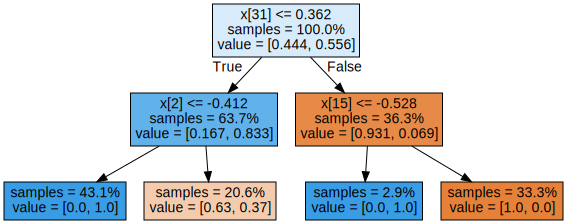

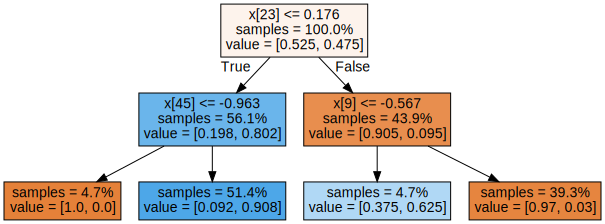

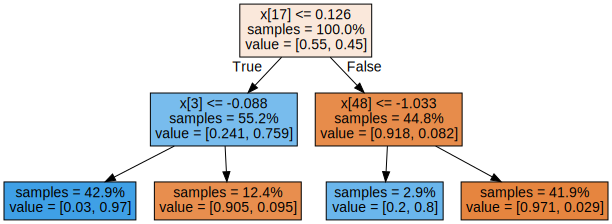

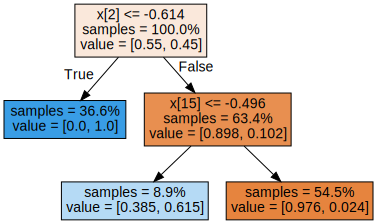

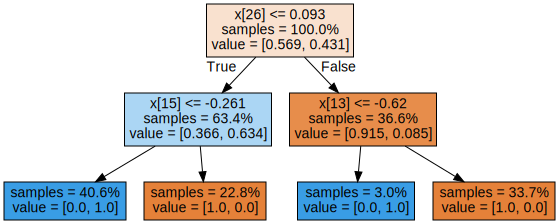

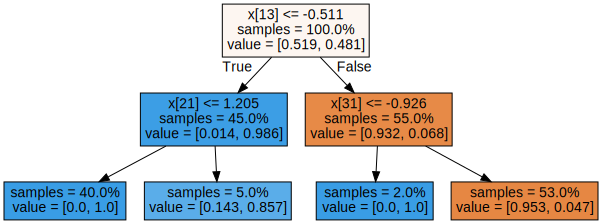

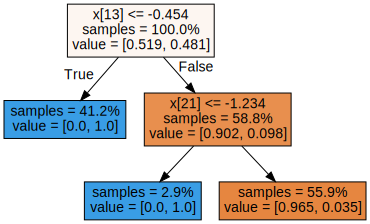

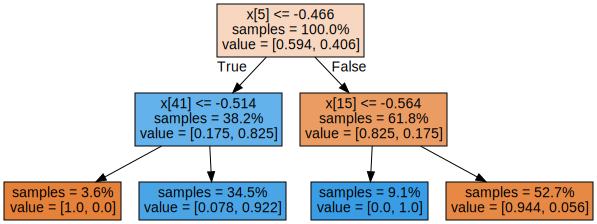

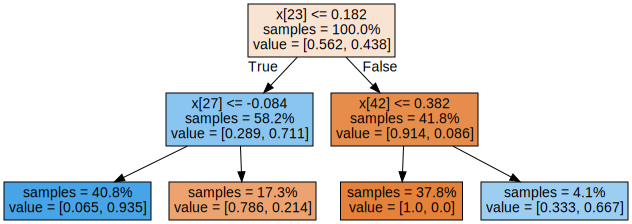

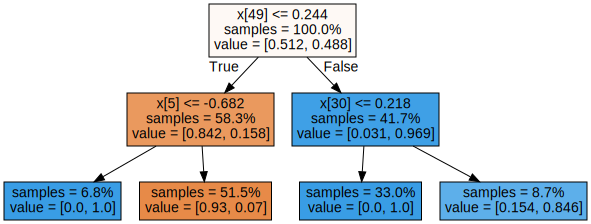

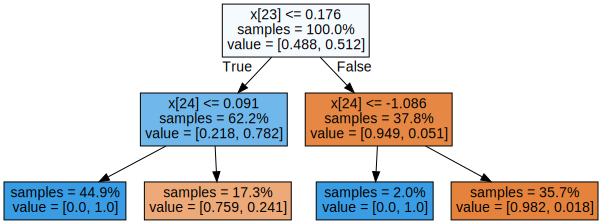

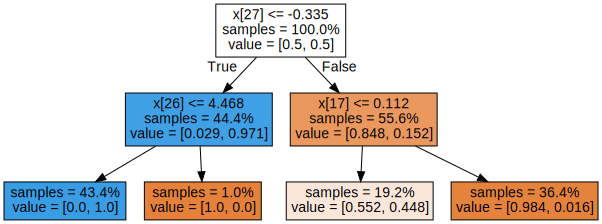

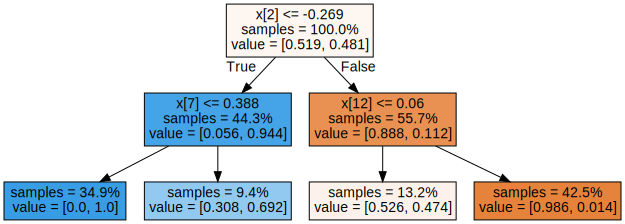

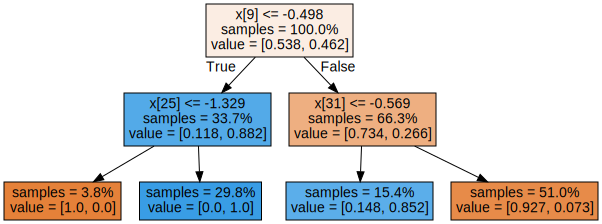

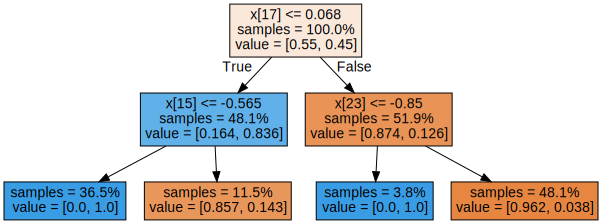

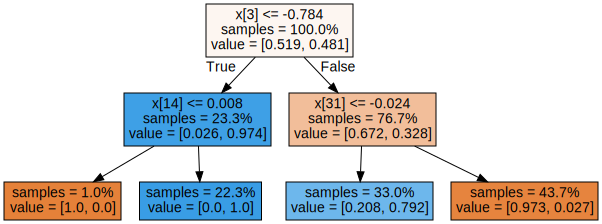

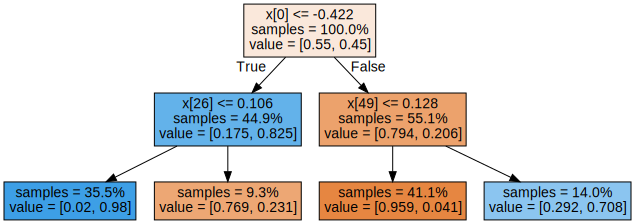

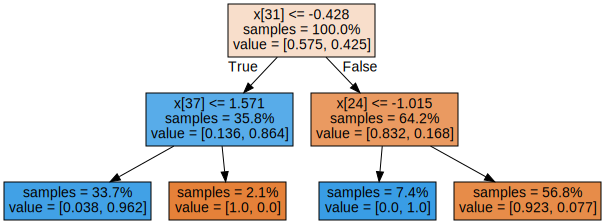

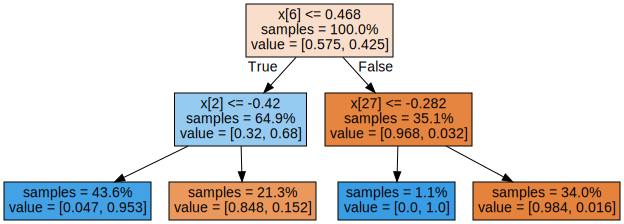

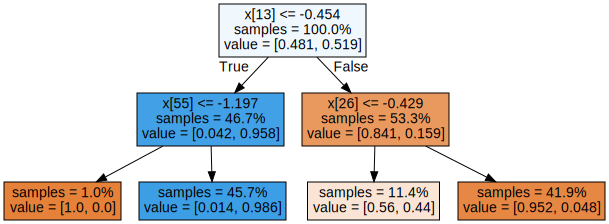

In [79]:
for i in range(20):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=None,  
                               filled=True,  
                               max_depth=5, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [80]:
accuracy_score(y_test,rf_result)

0.975

In [82]:
rf_accuracy = accuracy_score(y_test, rf_result)
print("Accuracy:", rf_accuracy)

Accuracy: 0.975


In [83]:
cm_rf = confusion_matrix(y_test,rf_result)
cm_rf

array([[18,  0],
       [ 1, 21]])

In [84]:
print(classification_report(rf_result, y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



##ANN  Artificial Neural Network  

In [85]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(3, ), random_state=1)

In [86]:
ann.fit(X_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3,), random_state=1,
              solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3,), random_state=1,
              solver='lbfgs')

In [87]:
ann_result = ann.predict(X_test)

In [88]:
ann_accuracy = accuracy_score(y_test, ann_result)
print("Accuracy:", ann_accuracy)

Accuracy: 1.0


In [89]:
cm_ann = confusion_matrix(y_test,ann_result)
cm_ann

array([[18,  0],
       [ 0, 22]])

In [90]:
print(classification_report(ann_result, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

